<class 'pandas.core.frame.DataFrame'>
Index: 7050 entries, 246675545449582_1649696485147474 to 1050855161656896_1050858841656528
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   status_type    7050 non-null   object 
 1   num_reactions  7050 non-null   int64  
 2   num_comments   7050 non-null   int64  
 3   num_shares     7050 non-null   int64  
 4   num_likes      7050 non-null   int64  
 5   num_loves      7050 non-null   int64  
 6   num_wows       7050 non-null   int64  
 7   num_hahas      7050 non-null   int64  
 8   num_sads       7050 non-null   int64  
 9   num_angrys     7050 non-null   int64  
 10  Column1        0 non-null      float64
 11  Column2        0 non-null      float64
 12  Column3        0 non-null      float64
 13  Column4        0 non-null      float64
dtypes: float64(4), int64(9), object(1)
memory usage: 826.2+ KB


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


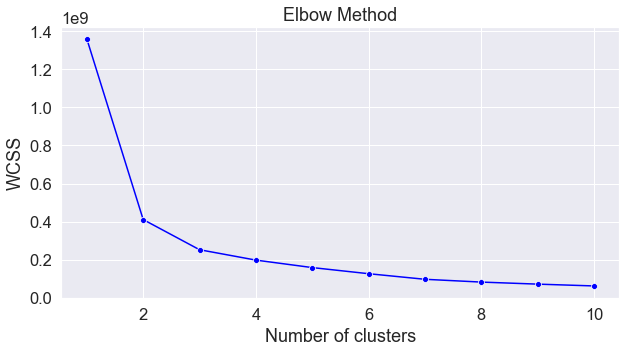

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\l

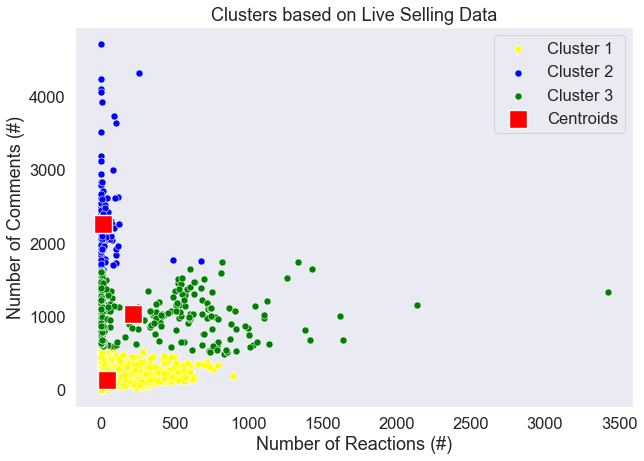

In [37]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as obj
obj.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

# Import Dataset
dataset = pd.read_csv('Live.csv',index_col='status_id')
dataset.info()
dataset.describe()
dataset.isnull().sum()
dataset.drop_duplicates(inplace=True)
X = dataset.iloc[:, [3, 4]].values

# use elbow method to find optimum k
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 77)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# plot the elbow graph
plt.figure(figsize=(10,5))
obj.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# use k-means to fit the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 77)
y_kmeans = kmeans.fit_predict(X)

# visualization
plt.figure(figsize=(10,7))
obj.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
obj.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
obj.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
obj.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters based on Live Selling Data')
plt.xlabel('Number of Reactions (#)')
plt.ylabel('Number of Comments (#)')
plt.legend()
plt.show()